<a href="https://colab.research.google.com/github/SwethaMagesh/Friend-Suggestion-using-AI/blob/main/AI_LAB_Friend_Suggestion_System_for_Social_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#start code here
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

GET DATA FROM CSV file 

In [2]:

edge_list_df = pd.read_csv("/content/Temporary Data - Edges.csv")
node_list_df = pd.read_csv("/content/Temporary Data - Node details.csv")
node_list_df.head()


,Node ID,Name,Location,Language,Occupation,School,Company,Interests,Age Group
0,1,Aishvarya,Coimbatore,Tamil,Software Engineer,PSG,Microsoft,"Orator, Movies",Young
1,2,Bianca,Chennai,Tamil,Software Engineer,PSG,Wipro,"Music, Books",Young
2,3,Deepthi,Madurai,Tamil,Software Engineer,PSG,Delloite,"Movies, Music",Young
3,4,Dhilip,Coimbatore,Telugu,Software Engineer,PSG,JPMC,"Tech, Quotes",Young
4,5,Harshini,Ramanathapuram,Tamil,Software Engineer,PSG,Oracle,"Movies, Cooking",Young


In [3]:
edge_list_df.head()

,Edge ID,Node 1,Node 2
0,1,1,18
1,2,2,12
2,3,8,12
3,4,3,15
4,5,3,6


Represent as graph data structures ( nodes , edges )

In [4]:
nodeList = node_list_df.values.tolist()
labels = [nodeList[i][1] for i in range(len(nodeList))]
nodeIds = [nodeList[i][0] for i in range(len(nodeList))]
labelsDict = dict()
for i in range(len(labels)):
  labelsDict[nodeIds[i]] = labels[i]
labelsDict

{1: 'Aishvarya',
 2: 'Bianca',
 3: 'Deepthi',
 4: 'Dhilip',
 5: 'Harshini',
 6: 'Indrajit',
 7: 'Iswaryaa',
 8: 'Jenitha',
 9: 'Keerthi',
 10: 'Mokshith',
 11: 'Preetham',
 12: 'Rishitha',
 13: 'Roshini',
 14: 'Sneha',
 15: 'Swetha',
 16: 'Vikasini',
 17: 'Vikram',
 18: 'Jana '}

In [5]:

edgeList = edge_list_df.values.tolist()
G = nx.Graph()
G.add_nodes_from(nodeIds)
for i in range(len(edgeList)):
    G.add_edge(edgeList[i][1], edgeList[i][2])
# and we can easily retrieve the adjacency matrix 
AdjMatrix = nx.adjacency_matrix(G).A

nx.set_node_attributes(G, labels, "labels")

In [6]:
print(G.nodes())
print(G.edges())

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
[(1, 18), (1, 15), (1, 14), (2, 12), (3, 15), (3, 6), (3, 7), (3, 16), (3, 5), (4, 6), (4, 11), (5, 15), (6, 9), (8, 12), (8, 10), (8, 17), (9, 13), (10, 11), (10, 15), (14, 15)]


Visualise the graph with networkx library

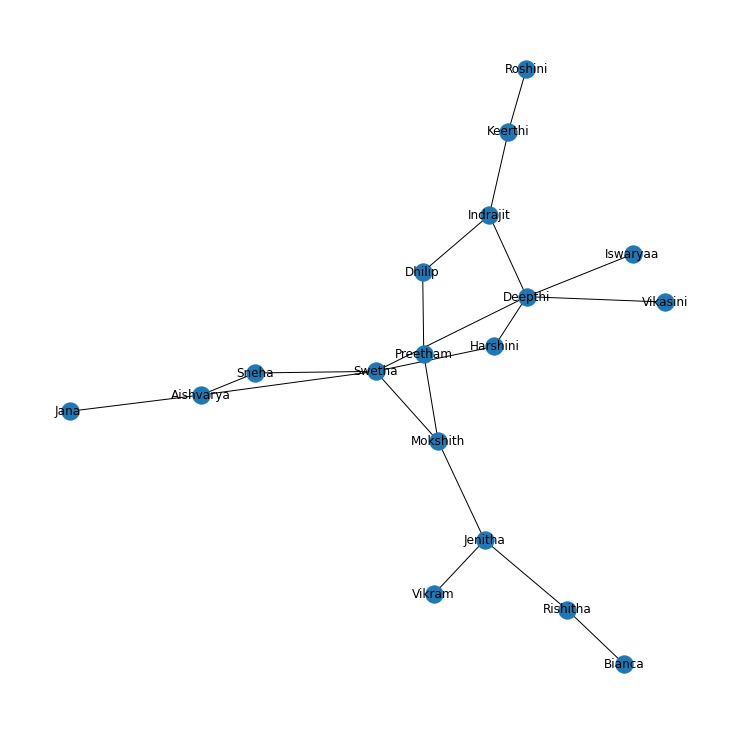

In [7]:
plt.figure(figsize=(10, 10))
nx.draw(G, with_labels=True, labels = labelsDict)
plt.savefig("visualise.png")

In [8]:
#process interests as list of strings
node_list_df['Interests'] = list(map(lambda x: x.split(', '), node_list_df['Interests'].values.tolist()))

In [9]:
# labelsDict
node_list_df.head()


,Node ID,Name,Location,Language,Occupation,School,Company,Interests,Age Group
0,1,Aishvarya,Coimbatore,Tamil,Software Engineer,PSG,Microsoft,"[Orator, Movies]",Young
1,2,Bianca,Chennai,Tamil,Software Engineer,PSG,Wipro,"[Music, Books]",Young
2,3,Deepthi,Madurai,Tamil,Software Engineer,PSG,Delloite,"[Movies, Music]",Young
3,4,Dhilip,Coimbatore,Telugu,Software Engineer,PSG,JPMC,"[Tech, Quotes]",Young
4,5,Harshini,Ramanathapuram,Tamil,Software Engineer,PSG,Oracle,"[Movies, Cooking]",Young


Search the nodes for the most probable friends

Possible logic...Brute force
1. Calculate score for all nodes (not its friends already)

  - same lang or location or company or interests (add 10 for each same thing)
  - age group, occupation, school same now

2. rank the scores of all nodes in descending order  

In [25]:
def predict_for_node(NODEID):
  columns=['Location', 'Language',  'Company', 'Occupation','School','Age Group']
  score = [[nodeIds[i],0] for i in range(len(nodeIds))]
  for i in nodeIds:
    # print(i)
    if G.has_edge(i,NODEID) or i == NODEID:
      continue
    else:
      # find score 
      temp_score = 0
      for col in columns:
        if node_list_df.loc[i-1][col]==node_list_df.loc[NODEID-1][col]:
          temp_score = temp_score + 10     
              
      interests_seta = set(node_list_df.loc[NODEID-1]['Interests'])
      interests_setb = set(node_list_df.loc[i-1]['Interests'])
      temp_score = temp_score +  0
      score[i-1][1] = temp_score       
      
      # assume node id is always 1 more than 0 index
      # Beware n check this part       

  # sort the score array with descending score and print the order fo nodeIDs
  result = sorted(score, key=lambda x:x[1], reverse = True)
  print("Scores are ",result[0][1], result[1][1], result[2][1])
  return [result[i][0] for i in range(len(result))]
  





In [26]:
predicted_list = predict_for_node(11)

for i in range(3):
  print(labelsDict[predicted_list[i]])


Scores are  50 40 40
Roshini
Aishvarya
Bianca
